<a href="https://colab.research.google.com/github/dominicwooldridge/GSB-S544/blob/Practice-Activities/Copy_of_Titanic_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [2]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [6]:
df_titanic_filtered = df_titanic[df_titanic['class'].isin(['1st', '2nd', '3rd'])]
df_titanic_filtered["class"].value_counts()

,count
class,
3rd,709
1st,324
2nd,284


In [13]:
pd.crosstab(df_titanic_filtered["class"], df_titanic_filtered["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [17]:
# the conditional distribution of their class given where they embarked
pd.crosstab(df_titanic_filtered["class"], df_titanic_filtered["embarked"], normalize='index')

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [16]:
#the conditional distribution of where they embarked given their class
pd.crosstab(df_titanic_filtered["embarked"], df_titanic_filtered["class"], normalize='index')

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


What proportion of 3rd class passengers embarked at Southampton: 0.696756

What proportion of Southampton passengers were in 3rd class: 0.540481

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


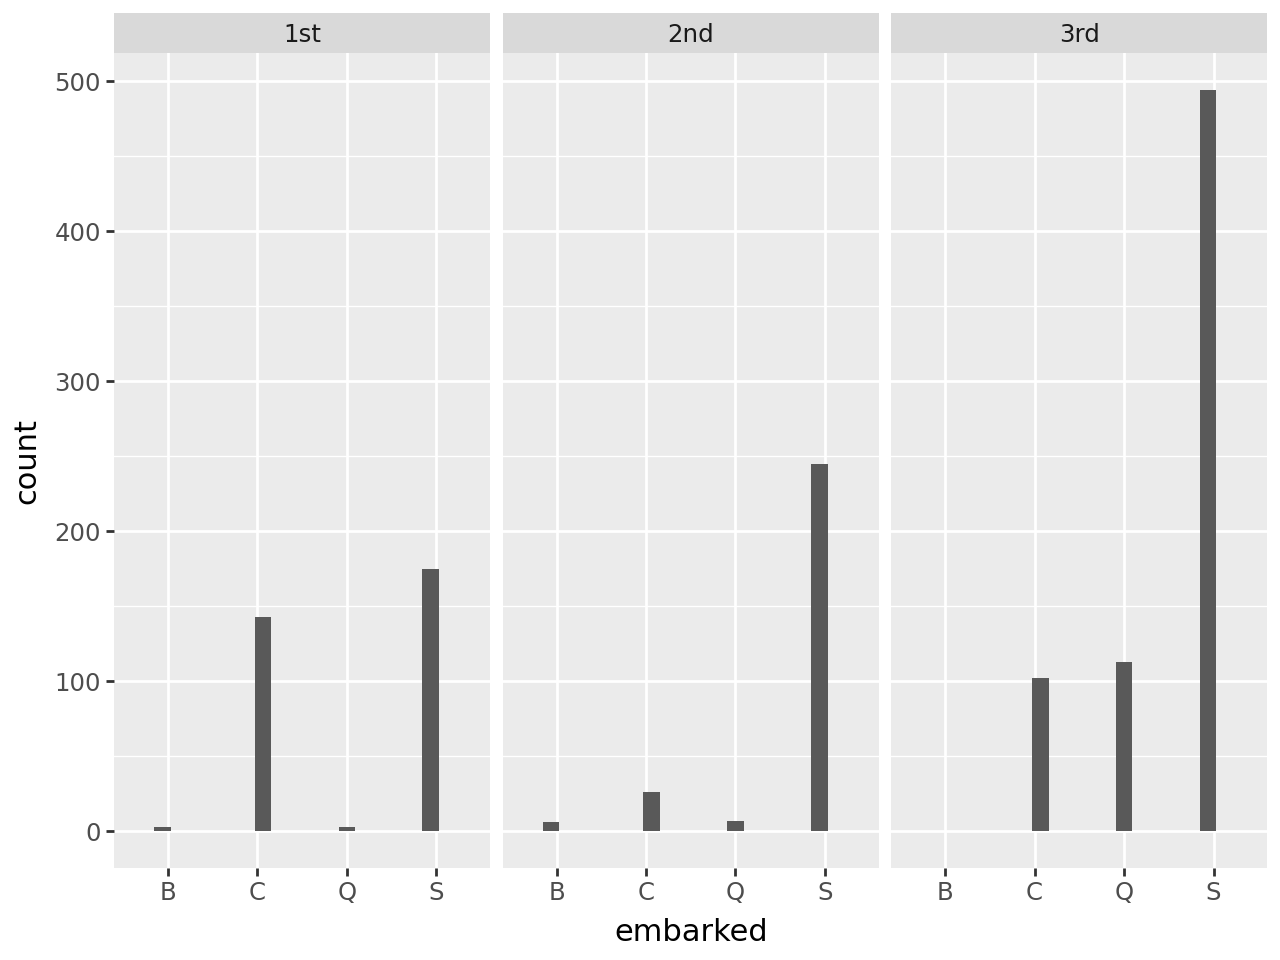

In [33]:
# Code here

from plotnine import ggplot, geom_histogram, aes, facet_wrap

(
    ggplot(df_titanic_filtered, aes(x='embarked',
                                    ))
    + geom_histogram()
    + facet_wrap("~class")
)

It is much easier to see the true proportion with the previous exercises, as I feel that there is a lot going on in this graph and it is not super intuitive.

Works cited: https://chatgpt.com/c/68db2fc9-9a68-8330-b8e4-cbb8a82acd93